## Hypothesis and Cost

In [1]:
import tensorflow as tf
import numpy as np

### Hypothesis

$$H(x) = Wx + b $$

### Cost

$$cost(W) = \frac {1}{m} \sum_{i=1}^m{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [6]:
x_data = [1,2,3,4,5]

In [7]:
y_data = [1,2,3,4,5]

(0.0, 8.0)

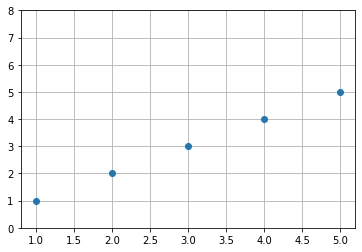

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.ylim(0,8)

### Hypothesis

In [11]:
v = [1.,2.,3.,4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [12]:
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [14]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [16]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [17]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

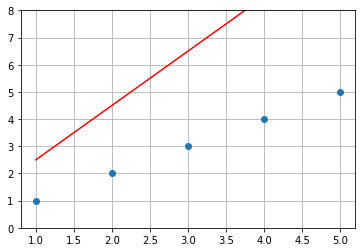

In [20]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)
plt.grid()
plt.show()

### Cost

In [21]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [23]:
with tf.GradientTape() as tape:
    hypothesis = W*x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

## Parameter Update

In [24]:
lr = 0.01

W.assign_sub(lr * W_grad)
b.assign_sub(lr * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

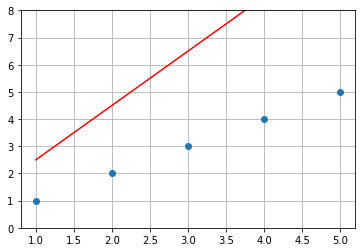

In [26]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.ylim(0, 8)

## Repeat Parameter Update

i:     0| W:     1.7500|b:     0.4300|cost:  14.250000
i:    10| W:     0.9990|b:     0.2146|cost:   0.071626
i:    20| W:     0.9502|b:     0.1939|cost:   0.007110
i:    30| W:     0.9486|b:     0.1866|cost:   0.006374
i:    40| W:     0.9501|b:     0.1803|cost:   0.005955
i:    50| W:     0.9517|b:     0.1743|cost:   0.005565
i:    60| W:     0.9533|b:     0.1685|cost:   0.005201
i:    70| W:     0.9549|b:     0.1629|cost:   0.004860
i:    80| W:     0.9564|b:     0.1574|cost:   0.004542
i:    90| W:     0.9578|b:     0.1522|cost:   0.004245


(0.0, 8.0)

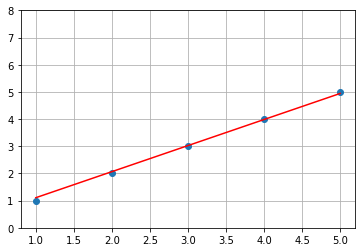

In [29]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(lr * W_grad)
    b.assign_sub(lr * b_grad)
    
    if i % 10 == 0:
        print("i: {:5}| W: {:10.4f}|b: {:10.4f}|cost: {:10.6f}".format(i, W.numpy(), b.numpy(), cost))
        
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.grid()
plt.ylim(0,8)